Epoch 1/50, Training Loss: 1.7048358450325705, Validation Loss: 0.001021180991773252
Epoch 2/50, Training Loss: 0.0009402009228819875, Validation Loss: 0.00045648711427390853
Epoch 3/50, Training Loss: 0.0004848061745600184, Validation Loss: 0.00020941644874660092
Epoch 4/50, Training Loss: 0.0003063025548571448, Validation Loss: 0.00010656351945794153
Epoch 5/50, Training Loss: 0.00023998665621947134, Validation Loss: 6.318415829877335e-05
Epoch 6/50, Training Loss: 0.00015917975264809631, Validation Loss: 4.375825260972811e-05
Epoch 7/50, Training Loss: 0.00012672980292558262, Validation Loss: 3.443474795656382e-05
Epoch 8/50, Training Loss: 0.0001498832763929859, Validation Loss: 2.9285089853887997e-05
Epoch 9/50, Training Loss: 9.572849772459775e-05, Validation Loss: 2.6521180390975336e-05
Epoch 10/50, Training Loss: 6.965634857192711e-05, Validation Loss: 2.4573685786216863e-05
Epoch 11/50, Training Loss: 6.088557474720254e-05, Validation Loss: 2.332048360484704e-05
Epoch 12/50, T

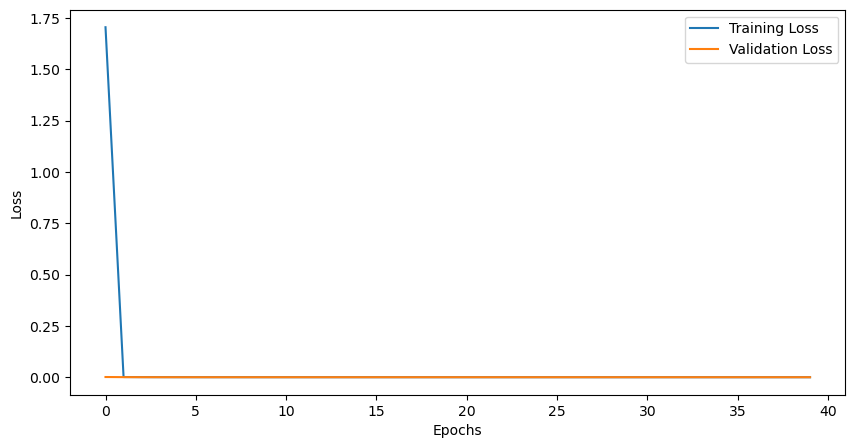

First 5 predictions: [[ 3.6788504e-05  1.1778677e-04 -2.3056338e-05  2.3486837e-05
   1.1407716e-05 -1.1587269e-05  1.8137138e-05  1.2885022e-04
   5.4720230e-04  8.0622465e-04  1.5451851e-03  2.2685179e-03
   3.3609509e-03  4.3979776e-03  5.3881616e-03  6.5348912e-03
   8.3820745e-03  1.1127405e-02  1.2579211e-02  1.3357094e-02]
 [ 3.6788504e-05  1.1778677e-04 -2.3056338e-05  2.3486837e-05
   1.1407716e-05 -1.1587269e-05  1.8137138e-05  1.2885022e-04
   5.4720230e-04  8.0622465e-04  1.5451851e-03  2.2685179e-03
   3.3609509e-03  4.3979776e-03  5.3881616e-03  6.5348912e-03
   8.3820745e-03  1.1127405e-02  1.2579211e-02  1.3357094e-02]
 [ 3.6788504e-05  1.1778677e-04 -2.3056338e-05  2.3486837e-05
   1.1407716e-05 -1.1587269e-05  1.8137138e-05  1.2885022e-04
   5.4720230e-04  8.0622465e-04  1.5451851e-03  2.2685179e-03
   3.3609509e-03  4.3979776e-03  5.3881616e-03  6.5348912e-03
   8.3820745e-03  1.1127405e-02  1.2579211e-02  1.3357094e-02]
 [ 3.6788504e-05  1.1778677e-04 -2.3056338e-05

In [121]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from torch.utils.data import TensorDataset, DataLoader,  random_split

X_file_path = 'X_data.pth'
Y_file_path = 'Y_data.pth'


X = torch.load(X_file_path).numpy() 
Y = torch.load(Y_file_path).numpy() 

X, Y = torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32)
dataset = TensorDataset(X, Y)

train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
batch_size = 120

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Parámetros de la red
input_size = 6001
hidden_size = [1024, 512, 256, 128]  
output_size = 20
learning_rate = 0.0005
num_epochs = 50  
weight_decay = 1e-4

# Definir el modelo MLP
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size[0])
        self.dropout1 = nn.Dropout(p=0.6)
        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.dropout2 = nn.Dropout(p=0.6)
        self.fc3 = nn.Linear(hidden_size[1], hidden_size[2])
        self.dropout3 = nn.Dropout(p=0.6)
        self.fc4 = nn.Linear(hidden_size[2], hidden_size[3])
        self.dropout4 = nn.Dropout(p=0.6)
        self.fc5 = nn.Linear(hidden_size[3], output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = torch.relu(self.fc4(x))
        x = self.dropout4(x)
        x = self.fc5(x)
        return x

#modelo
model = SimpleMLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Función de entrenamiento
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
        
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss}, Validation Loss: {val_loss}')

        # Early stopping
        if epoch > 10 and val_losses[-1] > val_losses[-2] > val_losses[-3]:
            print(f'Early stopping on epoch {epoch+1}')
            break

    return train_losses, val_losses

# Entrenar el modelo
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)

# Evaluar el modelo
def evaluate_model(model, test_loader):
    model.eval()
    predictions = []
    true_values = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            predictions.append(outputs.numpy())
            true_values.append(targets.numpy())

    predictions = np.concatenate(predictions)
    true_values = np.concatenate(true_values)

    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    
    # Calcular el R² promedio
    r2_scores = [r2_score(true, pred) for true, pred in zip(true_values, predictions)]
    r2_average = np.mean(r2_scores)


    return predictions, true_values

# Evaluar y obtener predicciones
predictions, true_values = evaluate_model(model, test_loader)

# Graficar las loss de entrenamiento y validación
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Mostrar las primeras 5 predicciones y valores reales
print(f'First 5 predictions: {predictions[:5]}')
print(f'First 5 true values: {true_values[:5]}')

Global R²: 0.890583400244765


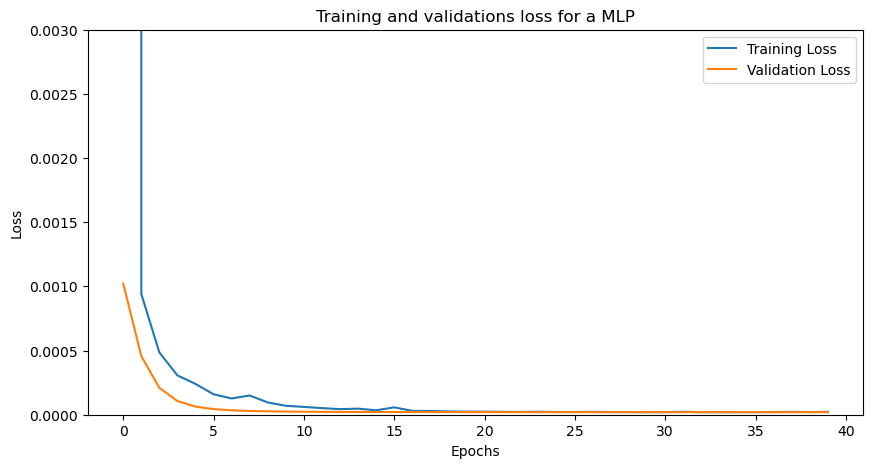

In [122]:

import numpy as np
from scipy.stats import pearsonr

pearson_corrs = []
r2_scores = []

for i in range(true_values.shape[0]):
    pearson_corr = np.corrcoef(true_values[i], predictions[i])[0, 1]
    r2 = pearson_corr ** 2
    pearson_corrs.append(pearson_corr)
    r2_scores.append(r2)

# Calcular el R² global como la media de todos los R²
global_r2 = np.mean(r2_scores)

print(f"Global R²: {global_r2}")

# Graficar las pérdidas de entrenamiento y validación
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and validations loss for a MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.003)  # Establecer el límite del eje y
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

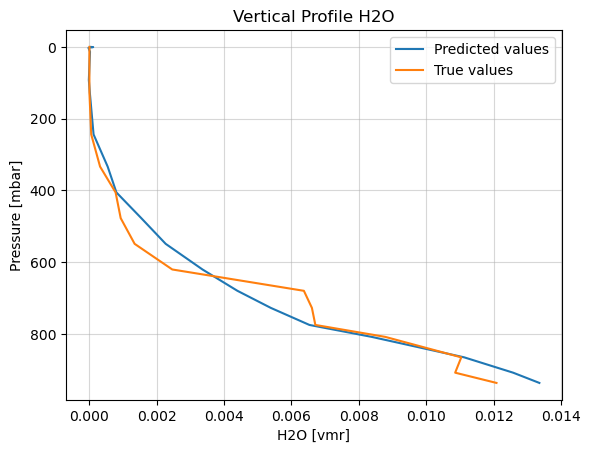

In [234]:
presiones = [1.5949503422e-01, 6.1677907944e-01, 2.6202105713e+00, 1.3643401489e+01, 4.0175408936e+01, 9.2365717773e+01, 1.2783702637e+02, 2.4388471558e+02, 3.3348357666e+02, 4.0541115967e+02, 4.7708076416e+02, 5.4860190674e+02, 6.1999756836e+02, 6.7943752563e+02, 7.2699364502e+02, 7.7449785034e+02, 8.0775010010e+02, 8.6473732971e+02, 9.0746744019e+02, 9.3596556274e+02]
plt.plot(predictions[520], presiones, label='Predicted values') #6 #15 #30 #360 #2400
plt.plot(true_values[520], presiones, label='True values')

plt.xlabel('H2O [vmr]')
plt.ylabel('Pressure [mbar]')
plt.title('Vertical Profile H2O')
plt.grid(True, alpha=0.5)
plt.gca().invert_yaxis()
plt.legend()
plt.show


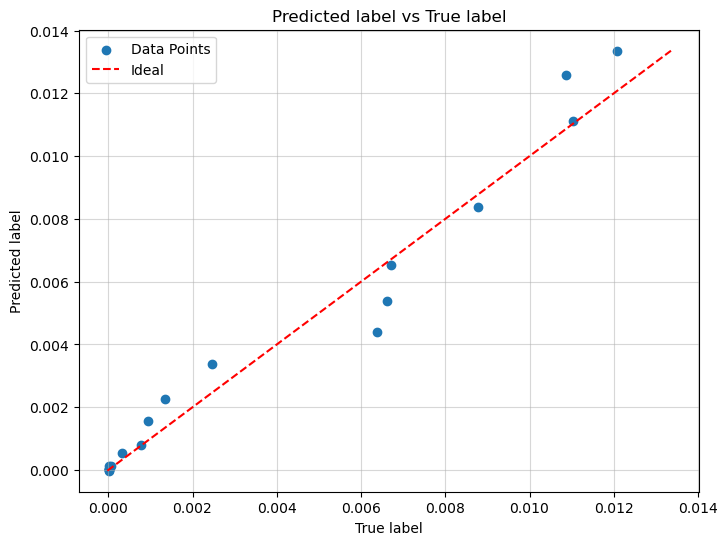

In [233]:
import matplotlib.pyplot as plt

# Índice del perfil que deseas graficar
selected_index = 520

# Verificar que el índice esté dentro del rango de las listas
if selected_index < len(predictions) and selected_index < len(true_values):
    plt.figure(figsize=(8, 6))
    
    # Graficar valores predichos frente a valores verdaderos
    plt.scatter(true_values[selected_index], predictions[selected_index], label='Data Points')
    
    # Graficar línea ideal
    min_val = min(min(true_values[selected_index]), min(predictions[selected_index]))
    max_val = max(max(true_values[selected_index]), max(predictions[selected_index]))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal')
    
    # Etiquetas de los ejes
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
    # Título del gráfico
    plt.title('Predicted label vs True label')
    
    # Mostrar la leyenda
    plt.legend()
    
    # Mostrar la cuadrícula
    plt.grid(True, alpha=0.5)
    
    # Mostrar el gráfico
    plt.show()
else:
    print(f"El índice {selected_index} está fuera del rango de las listas.")